<a href="https://colab.research.google.com/github/thiagopereiramagalhaes/Analise_de_Precos_de_Carros_no_Brasil_Estudo_de_Caso_em_Analise_de_Dados/blob/main/Analise_de_Precos_de_Carros_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autor:** Thiago Pereira Magalhães

**Turma:** Engenharia e Análise de DADOS - 2025.2

**Data de criação:** 02/11/2025

**Data da última alteração:** 03/11/2025

# Análise de Preços de Carros no Brasil

## Entendimento do Negócio



Este dataset aparenta conter informações detalhadas sobre preços de carros no Brasil ao longo do tempo, provavelmente para análise de mercado e precificação. As colunas como ano e mês de referência, código Fipe, marca, modelo, combustível, câmbio, tamanho do motor, ano do modelo e preço médio em BRL sugerem que o dataset é utilizado para rastrear e analisar a variação dos preços de diferentes veículos no mercado brasileiro, o que é essencial para o entendimento das tendências de preços e avaliação de veículos.

## Entendimento dos Dados

In [ ]:
import pandas as pd
pd.set_option('display.precision', 2)

In [ ]:
df = pd.read_csv("/content/precos_carros_brasil - precos_carros_brasil.csv")

In [ ]:
df.head(5)

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002,9162
1,2021,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001,8832
2,2021,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000,8388
3,2021,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000,8453
4,2021,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001,12525


In [ ]:
df.describe()

,year_of_reference,year_model,avg_price_brl
count,202297.00,202297.00,202297.00
mean,2021.56,2011.27,52756.91
std,0.57,6.38,51628.68
min,2021.00,2000.00,6647.00
25%,2021.00,2006.00,22855.00
50%,2022.00,2012.00,38027.00
75%,2022.00,2016.00,64064.00
max,2023.00,2023.00,979358.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202297 entries, 0 to 202296
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   year_of_reference   202297 non-null  int64 
 1   month_of_reference  202297 non-null  object
 2   fipe_code           202297 non-null  object
 3   authentication      202297 non-null  object
 4   brand               202297 non-null  object
 5   model               202297 non-null  object
 6   fuel                202297 non-null  object
 7   gear                202297 non-null  object
 8   engine_size         202297 non-null  object
 9   year_model          202297 non-null  int64 
 10  avg_price_brl       202297 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 17.0+ MB


In [ ]:
df.isnull().sum()

,0
year_of_reference,0
month_of_reference,0
fipe_code,0
authentication,0
brand,0
model,0
fuel,0
gear,0
engine_size,0
year_model,0


In [ ]:
df[df.duplicated()]

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
45793,2021,June,025232-8,5rtdwkpkpq5h,Renault,DUSTER OROCH Dyna. 2.0 Flex 16V Mec.,Gasoline,manual,2,2018,69893
189896,2022,December,003296-4,3r6c277cnqcb,Ford,Ranger Limited 3.0 PSE 4x4 CD TB Diesel,Diesel,manual,3,2007,64638


In [ ]:
df.select_dtypes(include='object').describe()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size
count,202297,202297,202297,202297,202297,202297,202297,202297
unique,12,2091,202295,6,2112,3,2,29
top,January,001216-5,3r6c277cnqcb,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6"
freq,24260,425,2,44962,425,168685,161885,47420


## Preparação dos dados

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df[df.isnull().any(axis=1)]

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl


In [ ]:
df.loc[187088, 'fuel'] = 'Gasoline/Alcohol'
df.loc[187088, 'gear'] = 'manual'
df.loc[187088, 'engine_size'] = '1.4'
df.loc[187088, 'year_model'] = 2022
df.loc[187088, 'avg_price_brl'] = 54836

In [ ]:
df.loc[187088]

,187088
year_of_reference,2022
month_of_reference,December
fipe_code,004433-4
authentication,yl00zdfhc0y1
brand,GM - Chevrolet
model,PRISMA Sed. LT 1.4 8V FlexPower 4p
fuel,Gasoline/Alcohol
gear,manual
engine_size,1.4
year_model,2022


## Análise Exploratória dos Dados

### Distribuição da Quantidade de Carros por Marca

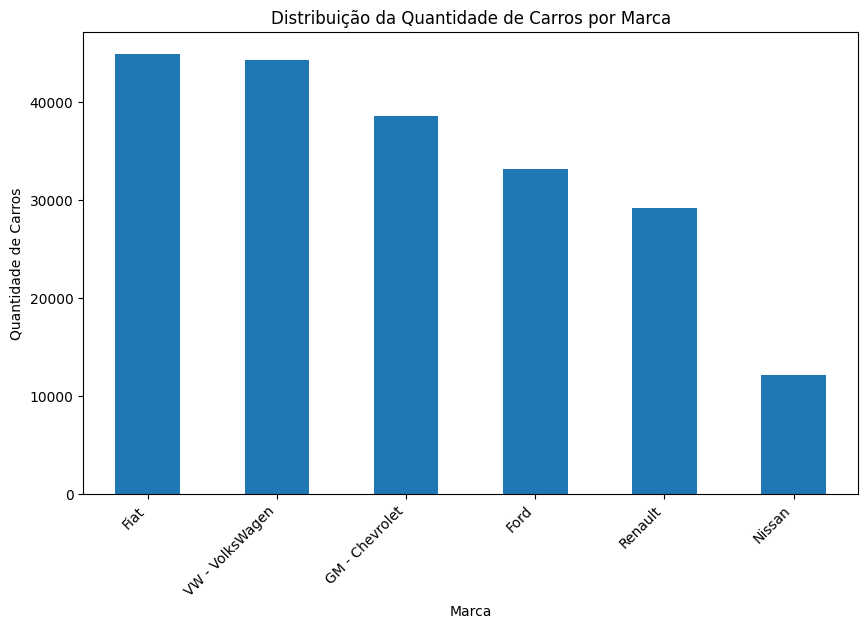

In [ ]:
df['brand'].value_counts().plot(kind='bar',figsize=(10, 6))
plt.title('Distribuição da Quantidade de Carros por Marca')
plt.xlabel('Marca')
plt.ylabel('Quantidade de Carros')
plt.xticks(rotation=45, ha='right')
plt.show()

### Distribuição da Quantidade de Carros por Tipo de Câmbio

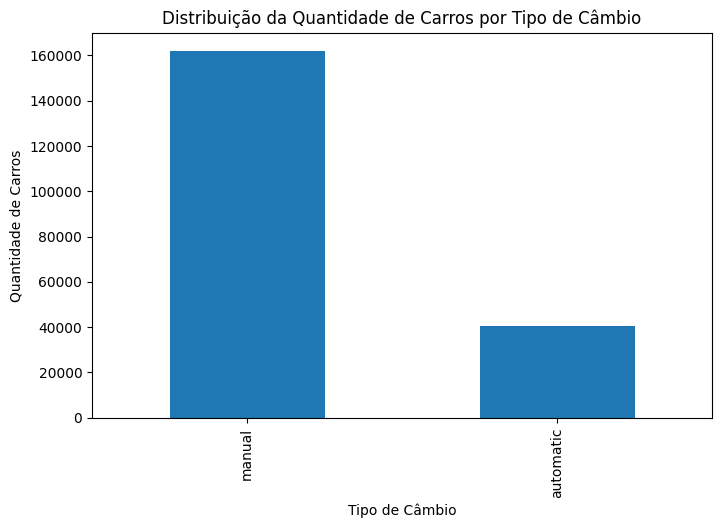

In [ ]:
df['gear'].value_counts().plot(kind='bar',figsize=(8, 5))

plt.title('Distribuição da Quantidade de Carros por Tipo de Câmbio')
plt.xlabel('Tipo de Câmbio')
plt.ylabel('Quantidade de Carros')
plt.show()

### Evolução do Preço Médio dos Carros ao Longo dos Meses em 2022


In [ ]:
ordem_mes = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

/tmp/ipython-input-409571971.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2022.groupby('month_of_reference')['avg_price_brl'].mean().plot(kind='line',figsize=(12, 6))


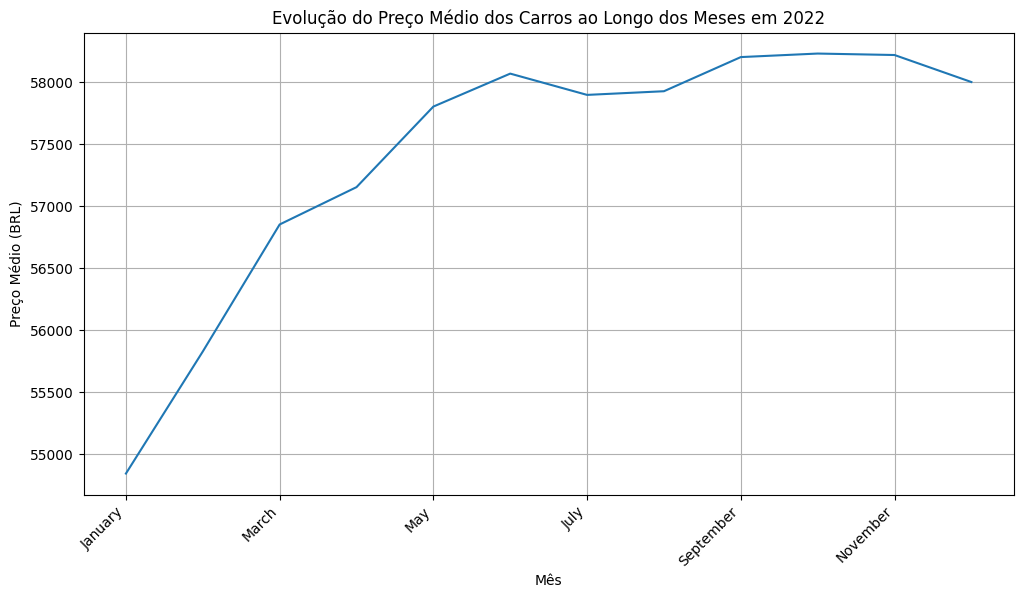

In [ ]:
df_2022 = df[df['year_of_reference'] == 2022].copy()

df_2022['month_of_reference'] = pd.Categorical(df_2022['month_of_reference'], categories=month_order, ordered=True)

df_2022.groupby('month_of_reference')['avg_price_brl'].mean().plot(kind='line',figsize=(12, 6))

plt.title('Evolução do Preço Médio dos Carros ao Longo dos Meses em 2022')
plt.xlabel('Mês')
plt.ylabel('Preço Médio (BRL)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

### Preço Médio dos Carros por Marca e Tipo de Câmbio

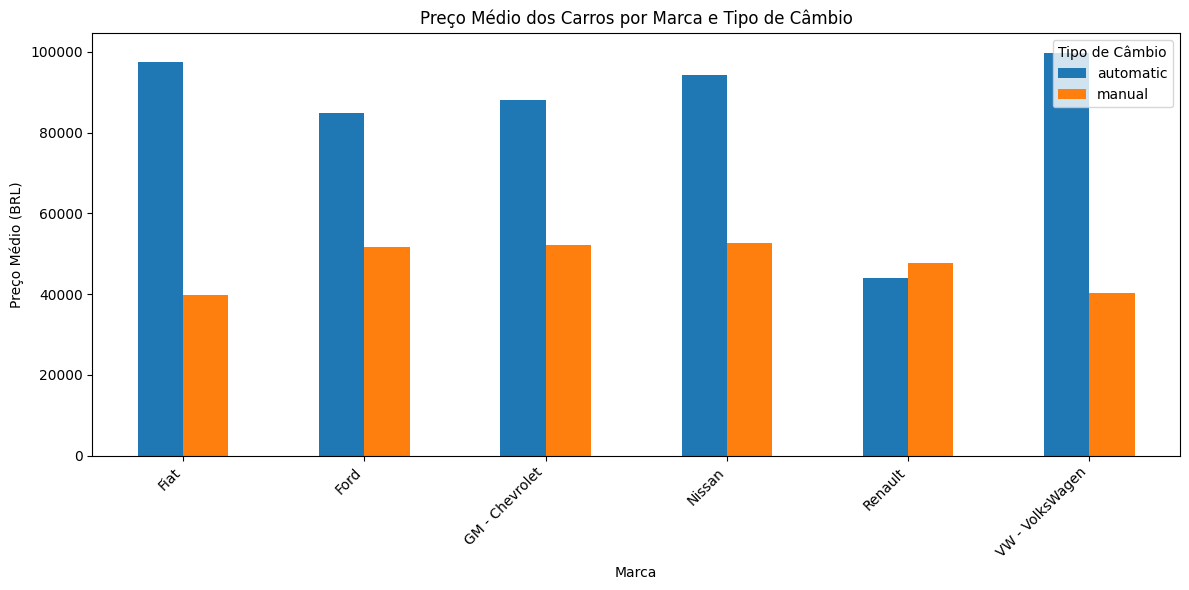

In [ ]:
avg_price_by_brand_gear = df.groupby(['brand', 'gear'])['avg_price_brl'].mean().unstack()

avg_price_by_brand_gear.plot(kind='bar', figsize=(12, 6))
plt.title('Preço Médio dos Carros por Marca e Tipo de Câmbio')
plt.xlabel('Marca')
plt.ylabel('Preço Médio (BRL)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Câmbio')
plt.tight_layout()
plt.show()

O gráfico mostra a média de preço por marca e tipo de câmbio. Para a maioria das marcas, carros com câmbio automático tendem a ter um preço médio maior do que carros com câmbio manual.

### Preço Médio dos Carros por Marca e Tipo de Combustível

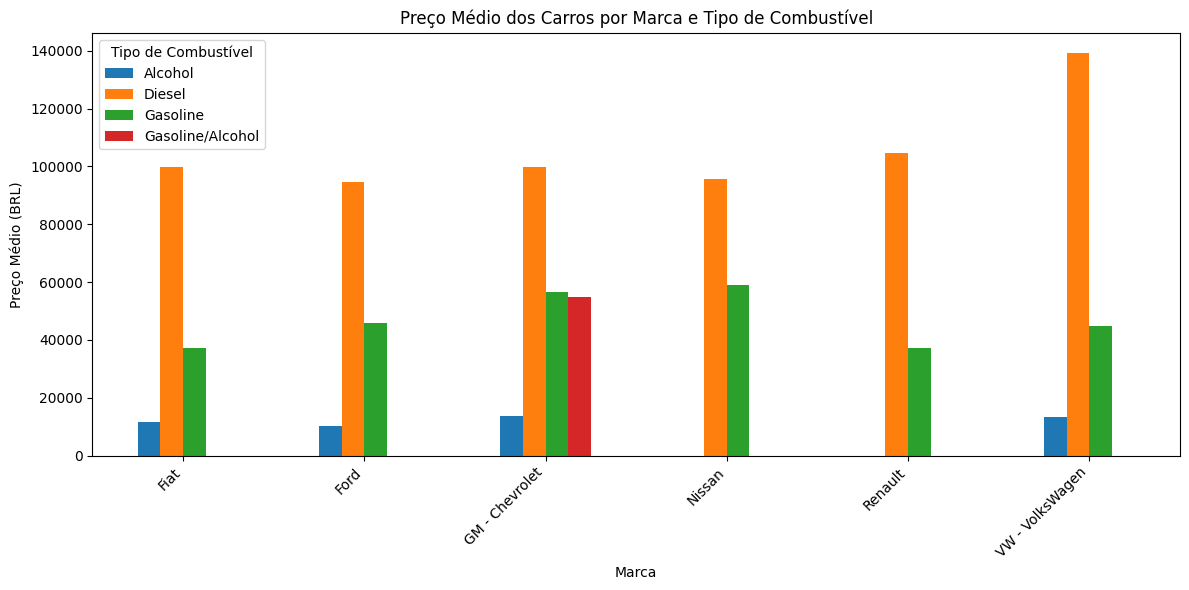

In [ ]:
avg_price_by_brand_fuel = df.groupby(['brand', 'fuel'])['avg_price_brl'].mean().unstack()

avg_price_by_brand_fuel.plot(kind='bar', figsize=(12, 6))
plt.title('Preço Médio dos Carros por Marca e Tipo de Combustível')
plt.xlabel('Marca')
plt.ylabel('Preço Médio (BRL)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Combustível')
plt.tight_layout()
plt.show()

O gráfico de barras mostra o preço médio dos carros por marca e tipo de combustível. Carros a Diesel geralmente apresentam um preço médio mais elevado em comparação com carros a Gasolina ou Álcool.

## Conclusão da Análise

 Os principais resultados são a predominância das marcas Fiat, VW, GM e Ford, a prevalência de carros com câmbio manual e uma tendência geral de aumento no preço médio dos carros ao longo dos meses em 2022, com uma ligeira queda em dezembro.